(569, 31)
(569, 30)
(569,)
(455, 30)
(455,)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Mean Accuracy (Cross-Validation) - AdaBoost: 0.9144444444444446
Accuracy (Test Set) - AdaBoost: 0.956140350877193
Precision (Test Set) - AdaBoost: 0.9361702127659575
Recall (Test Set) - AdaBoost: 0.9565217391304348
F1 Score (Test Set) - AdaBoost: 0.9462365591397849
AUC (Test Set) - AdaBoost: 0.9562020460358057


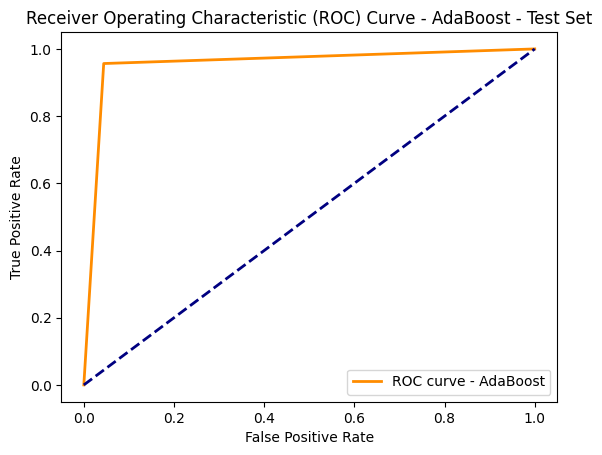

In [12]:
from re import S
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

file_path='/content/project3_dataset1.txt'
# file_path='/content/project3_dataset2.txt'

data=np.loadtxt(file_path)
print(data.shape)



X =  data[:, :-1]
y = data[:, -1]


print((X).shape)
print((y).shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print((X_train).shape)
print((y_train).shape)
y_train = y_train.reshape(-1, 1)



clf = DecisionTreeClassifier(random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')  # You can change scoring to other metrics




clf.fit(X_train, y_train)




# AUC (Test Set): 0.948849104859335





# Adaboost fine best n_estimators



clf_adaboost = AdaBoostClassifier(clf, n_estimators=100, random_state=42, learning_rate= 0.00001)


cv_scores_adaboost = cross_val_score(clf_adaboost, X_train, y_train, cv=10, scoring='accuracy')

# Print the mean accuracy
print("Mean Accuracy (Cross-Validation) - AdaBoost:", np.mean(cv_scores_adaboost))

# Fit the AdaBoost model on the training set
clf_adaboost.fit(X_train, y_train)

# Predict on the test set
y_pred_test_adaboost = clf_adaboost.predict(X_test)

# Calculate and print metrics on the test set
accuracy_test_adaboost = accuracy_score(y_test, y_pred_test_adaboost)
precision_test_adaboost = precision_score(y_test, y_pred_test_adaboost)
recall_test_adaboost = recall_score(y_test, y_pred_test_adaboost)
f1_test_adaboost = f1_score(y_test, y_pred_test_adaboost)
auc_test_adaboost = roc_auc_score(y_test, y_pred_test_adaboost)

print("Accuracy (Test Set) - AdaBoost:", accuracy_test_adaboost)
print("Precision (Test Set) - AdaBoost:", precision_test_adaboost)
print("Recall (Test Set) - AdaBoost:", recall_test_adaboost)
print("F1 Score (Test Set) - AdaBoost:", f1_test_adaboost)
print("AUC (Test Set) - AdaBoost:", auc_test_adaboost)
# Plot ROC curve for the test set - AdaBoost
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_pred_test_adaboost)
plt.figure()
plt.plot(fpr_adaboost, tpr_adaboost, color='darkorange', lw=2, label='ROC curve - AdaBoost')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost - Test Set')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

<Figure size 1200x800 with 0 Axes>

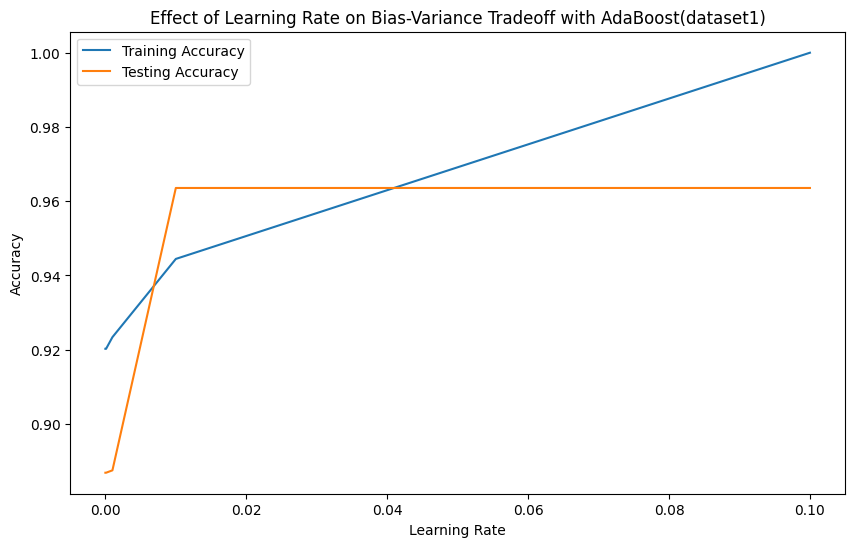

[0.9635549872122762, 0.9635549872122762, 0.887468030690537, 0.8868286445012787, 0.8868286445012787]


In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train, X_test, and y_test defined

def ada_boost_clf(X_train, y_train, X_test, y_test, n_esti, learning_rate):
    clf_base = DecisionTreeClassifier(max_depth=1)  # Define a base classifier, e.g., a decision tree with max_depth=1
    clf_adaboost = AdaBoostClassifier(clf_base, n_estimators=n_esti, random_state=42, learning_rate=learning_rate)
    clf_adaboost.fit(X_train, y_train)

    # Predictions on training set
    train_predictions_adaboost = clf_adaboost.predict(X_train)

    # Predictions on testing set
    test_predictions_adaboost = clf_adaboost.predict(X_test)

    # Calculate accuracy
    train_accuracy_adaboost = accuracy_score(y_train, train_predictions_adaboost)
    test_accuracy_adaboost = accuracy_score(y_test, test_predictions_adaboost)

    return train_accuracy_adaboost, test_accuracy_adaboost

# Experiment with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001,0.000001]
trn_accuracies_ada=[]
test_accuracies_ada=[]
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    n_estimators = 200  # Choose a constant number of estimators
    train_acc_ada, test_acc_ada = ada_boost_clf(X_train, y_train, X_test, y_test, n_esti=n_estimators, learning_rate=lr)
    trn_accuracies_ada.append(train_acc_ada)
    test_accuracies_ada.append(test_acc_ada)

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, trn_accuracies_ada, label='Training Accuracy')
plt.plot(learning_rates, test_accuracies_ada, label='Testing Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on Bias-Variance Tradeoff with AdaBoost(dataset1)')
plt.legend()
plt.show()
print(test_accuracies_ada)

